# Generate Start Data

In the absense of having data on hand I will have to generate a bunch of fake data.

In [5]:
%matplotlib inline

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import uuid
from control.matlab import *
import os

In [7]:
# Generate 5 minutes of data at 0.1s resolution.
dt = 0.1
t0 = 0
tfinal = 300
T = np.arange(t0, tfinal+dt, dt)

In [ ]:
# Cheap way to 
def crank_speed_gen(start=200, end):
    return np.random.uniform(start, end)

In [8]:
def gen_start1(T):
    # No Start.
    crank_speed = np.random.uniform(200,210)
    idle_speed  = np.random.uniform(595, 605)

    crank_time = np.random.uniform(10,60)
    crank_duration = np.random.uniform(5, 15)
    
    # Assume engine is a 1st order transfer function with 1s time constant & unity gain.
    # "A horse is a sphere if it makes the equations easier"
    sys1 = tf([1],[1,1])
    
    # Simulate a good start.
    U = np.zeros(T.shape)
    U[(T>crank_time)]=crank_speed
    
    U[(T>crank_time+crank_duration)]=0
    start_type = "no"

    yout, T, xout = lsim(sys1, U=U, T=T)
    
    N = np.random.normal(0, 10, yout.shape)
    yout[U>0]+=N[U>0]
        
    return yout

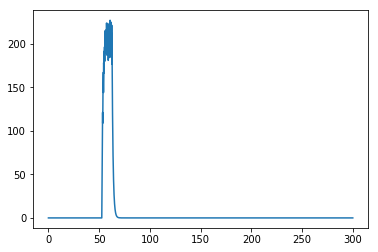

In [9]:
yout = gen_start1(T)
plt.plot(T, yout)

In [10]:
def gen_start2(T):
    # Good Start.
    crank_speed = np.random.uniform(200,210)
    idle_speed  = np.random.uniform(595, 605)

    crank_time = np.random.uniform(10,60)
    crank_duration = np.random.uniform(5, 15)

    # Assume engine is a 1st order transfer function with 1s time constant & unity gain.
    # "A horse is a sphere if it makes the equations easier"
    sys1 = tf([1],[1,1])
    
    # Simulate a good start.
    U = np.zeros(T.shape)
    U[(T>crank_time)]=crank_speed
    U[(T>crank_time+crank_duration)]=idle_speed
    
    yout, T, xout = lsim(sys1, U=U, T=T)
    
    N = np.random.normal(0, 10, yout.shape)
    yout[U>0]+=N[U>0]
        
    return yout

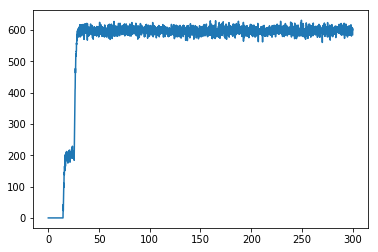

In [11]:
yout = gen_start2(T)
plt.plot(T, yout)

In [12]:
def gen_start3(T):
    # Ringing Start.
    crank_speed = np.random.uniform(200,210)
    idle_speed  = np.random.uniform(595, 605)

    crank_time = np.random.uniform(10,60)
    crank_duration = np.random.uniform(5, 15)
    
    # Simulate a good start.
    U = np.zeros(T.shape)
    U[(T>crank_time)]=crank_speed
    U[(T>crank_time+crank_duration)]=idle_speed
    
    wn = 1
    zeta = .1
    sys2 = tf(wn ** 2, [1, 2*wn*zeta, wn ** 2])
    
    yout, T, xout = lsim(sys2, U=U, T=T)
    
    T2 = crank_time+crank_duration
    
    N = np.random.normal(0, 10, yout.shape)
    yout[U>0]+=N[U>0]
        
    return yout

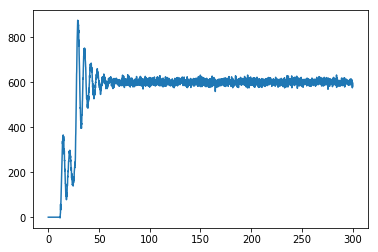

In [13]:
yout = gen_start3(T)
plt.plot(T, yout)

In [14]:
def gen_start4(T):
    # Overshoot Start.
    crank_speed = np.random.uniform(200,210)
    idle_speed  = np.random.uniform(595, 605)

    crank_time = np.random.uniform(10,60)
    crank_duration = np.random.uniform(5, 15)
    
    # Simulate a good start.
    U = np.zeros(T.shape)
    U[(T>crank_time)]=crank_speed
    U[(T>crank_time+crank_duration)]=idle_speed
    
    wn = 1
    zeta = 0.5
    sys2 = tf(wn ** 2, [1, 2*wn*zeta, wn ** 2])
    
    yout, T, xout = lsim(sys2, U=U, T=T)
    
    T2 = crank_time+crank_duration
    
    N = np.random.normal(0, 10, yout.shape)
    yout[U>0]+=N[U>0]
        
    return yout

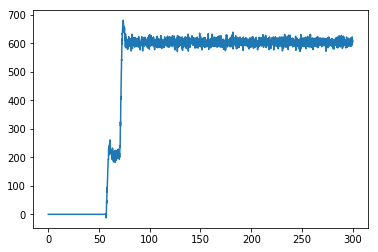

In [41]:
yout = gen_start4(T)
plt.plot(T, yout)

In [42]:
def gen_start5(T):
    # Overdamped Start.
    crank_speed = np.random.uniform(200,210)
    idle_speed  = np.random.uniform(595, 605)

    crank_time = np.random.uniform(10,60)
    crank_duration = np.random.uniform(5, 15)

    # Assume engine is a 1st order transfer function with 1s time constant & unity gain.
    # "A horse is a sphere if it makes the equations easier"
    sys1 = tf([1],[20,1])
    
    # Simulate a good start.
    U = np.zeros(T.shape)
    U[(T>crank_time)]=crank_speed
    U[(T>crank_time+crank_duration)]=idle_speed
    
    yout, T, xout = lsim(sys1, U=U, T=T)
    
    N = np.random.normal(0, 10, yout.shape)
    yout[U>0]+=N[U>0]
        
    return yout

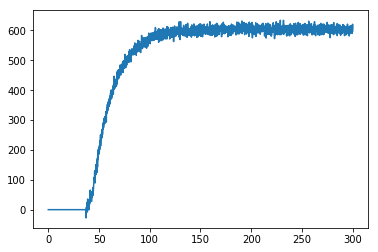

In [43]:
yout = gen_start5(T)
plt.plot(T, yout)

In [24]:
starts = [gen_start1, gen_start2, gen_start3, gen_start4, gen_start5]

In [1]:
for start in starts:
    yout = start(T)
    print(start.__name__)
    plt.plot(T, yout)
    plt.show()

NameError: name 'starts' is not defined

In [26]:
starts[0].__name__

'gen_start1'

In [37]:
dataset="/mnt/pit/NeuralNetWork/Start_Classifier/dataset"

In [38]:
for _ in range(5):
    for start in starts:
        fig = plt.figure(figsize=(4,4), dpi=64)

        yout = start(T)
        fig.clf()
        plt.plot(T,yout)
        plt.axis('off')

        base_dir = os.path.join(dataset, start.__name__)

        if not os.path.exists(base_dir):
            os.makedirs(base_dir)

        U =  uuid.uuid4()
        img_name = str(U)+".png"
        img_path = os.path.join(base_dir, img_name)
        plt.savefig(img_path, 
                    pad_inches=0.0,
                    dpi='figure')
        plt.close(plt.gcf())

In [ ]:
yout = start(T)
fig.clf()
plt.plot(T,yout)
plt.axis('off')